In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim


In [3]:
sa = pd.read_csv(r"..\Data\SAdata\SA-Metadata\SA-metadata.csv")


In [4]:
sa.Year.unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2008, 2009, 2010, 2011, 2012, 2014], dtype=int64)

In [11]:
sa.columns

Index(['ProfileID', 'AnswerID', 'Unit of measurement', 'Survey',
       'QuestionaireID', 'Year', 'LocName', 'Municipality', 'cb_size',
       'females16to24', 'females25to34', 'females35to49', 'femalesolder50',
       'femalesyounger16', 'floor_area', 'head emploed part time',
       'head on pension', 'head unemployed', 'headparttime', 'headunemployed',
       'males16to24', 'males25to34', 'males35to49', 'malesolder50',
       'malesyounger16', 'monthly_income', 'number of females: 16-24',
       'number of females: 25-34', 'number of females: 35 - 49',
       'number of females: <16', 'number of males: 16-24',
       'number of males: 25 - 34', 'number of males: 35-49',
       'number of males: 50+', 'number of males: <16', 'older16parttime',
       'older16unemployed',
       'persions younger than 16 year : employed parttime',
       'persons older than 16 years: employed parttime',
       'persons older than 16 years: employed unemployed',
       'persons older than 16 years: pen

In [12]:
sa.head()

,ProfileID,AnswerID,Unit of measurement,Survey,QuestionaireID,Year,LocName,Municipality,cb_size,females16to24,...,washing_machine,3_plate_use,4_plate_use,geyser_use,heater_use,hotplate_use,iron_use,kettle_use,microwave_use,washing_machine_use
0,121,1367,2,NRS LR,6,1994,Cloetesville,Stellenbosch,60.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122,1368,2,NRS LR,6,1994,Cloetesville,Stellenbosch,60.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123,1365,2,NRS LR,6,1994,Cloetesville,Stellenbosch,60.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,124,1370,2,NRS LR,6,1994,Cloetesville,Stellenbosch,60.0,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125,1364,2,NRS LR,6,1994,Cloetesville,Stellenbosch,60.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sa.heater_use.unique()

array([nan, 'monthly', 'weekly', 'daily', 'never'], dtype=object)

In [17]:
groups = sa.groupby("heater_use").apply(lambda x: len(x))
groups

heater_use
daily       704
monthly     359
never      4924
weekly      507
dtype: int64

In [12]:
len(sa)-len(groups)

12248

In [14]:
sa_2014 = sa[sa["Year"] == 2014]

In [15]:
sa_2014.head()

,ProfileID,AnswerID,Unit of measurement,Survey,QuestionaireID,Year,LocName,Municipality,cb_size,females16to24,...,washing_machine,3_plate_use,4_plate_use,geyser_use,heater_use,hotplate_use,iron_use,kettle_use,microwave_use,washing_machine_use
10188,12024365,1004655,2,Eskom LR,3,2014,Butterworth,Mnquma,20.0,NaN,...,0.0,never,never,never,never,daily,weekly,daily,never,never
10189,12024366,1004655,4,Eskom LR,3,2014,Butterworth,Mnquma,20.0,NaN,...,0.0,never,never,never,never,daily,weekly,daily,never,never
10190,12024367,1004655,5,Eskom LR,3,2014,Butterworth,Mnquma,20.0,NaN,...,0.0,never,never,never,never,daily,weekly,daily,never,never
10191,12024369,1004656,2,Eskom LR,3,2014,Butterworth,Mnquma,20.0,NaN,...,0.0,never,never,never,never,daily,weekly,daily,daily,never
10192,12024370,1004656,4,Eskom LR,3,2014,Butterworth,Mnquma,20.0,NaN,...,0.0,never,never,never,never,daily,weekly,daily,daily,never


In [16]:
sa_2014.heater_use.unique()

array(['never', 'daily', 'weekly', 'monthly'], dtype=object)

In [26]:
municipality = sa_2014.Municipality.unique()

In [38]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")
lat = []
lon = []
place = []
for i in range(len(municipality)): 
    location = geolocator.geocode(municipality[i])
    if location is None: 
        continue
    print(location.address)
    lat.append(location.latitude)
    lon.append(location.longitude)
    place.append(municipality[i])



Mnquma Local Municipality, Amathole District Municipality, Eastern Cape, 4960, South Africa
Mantsopa Local Municipality, Thabo Mofutsanyana District Municipality, Free State, 9745, South Africa
Kouga, Salamat سلامات, Tchad / تشاد
Rustenburg, Bojanala Platinum District Municipality, North West, South Africa
Mbombela, Ehlanzeni, Mpumalanga, South Africa
uMhlathuze Local Municipality, King Cetswayo District Municipality, KwaZulu-Natal, South Africa
Emfuleni, Lephalale Ward 3, Lephalale Local Municipality, Waterberg District Municipality, Limpopo, South Africa
Matjhabeng Local Municipality, Lejweleputswa District Municipality, Free State, South Africa
Mangaung, Bloemfontein, Mangaung Metropolitan Municipality, Free State, South Africa
Thembisile Hani Local Municipality, Nkangala, Mpumalanga, 1022, South Africa
City of Ekurhuleni Metropolitan Municipality, Gauteng, South Africa


In [42]:
import folium
import pandas as pd
 
# Make a data frame with dots to show on the map
data = pd.DataFrame({
'lat':lon,
'lon':lat,
'name':place
})
data
 
# Make an empty map
m = folium.Map(location=[20, 0], tiles="OpenStreetMap", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']], popup=data.iloc[i]['name']).add_to(m)
 
# Save it as html
m.save('312_markers_on_folium_map1.html')

In [6]:
usage = sa[['3_plate_use', '4_plate_use',
       'geyser_use', 'heater_use', 'hotplate_use', 'iron_use', 'kettle_use',
       'microwave_use', 'washing_machine_use']]

In [17]:
e = [None]*9
ind = 0
for i in usage.columns: 
    e[ind] = usage.groupby(i).apply(lambda x: len(x))
    ind+=1
    

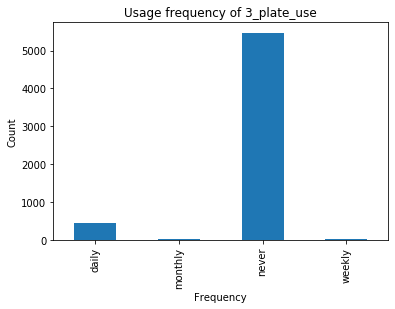

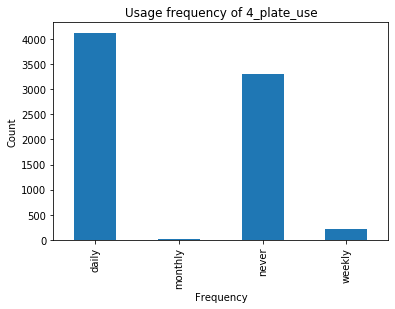

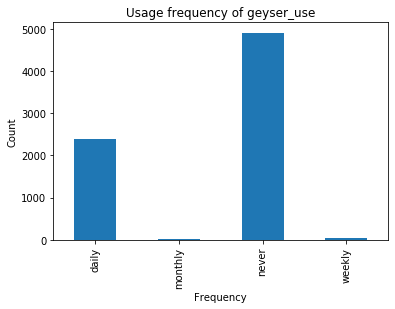

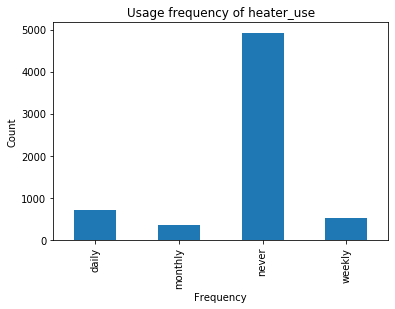

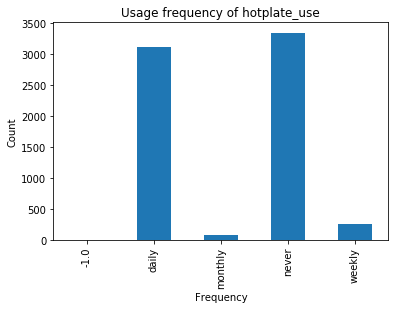

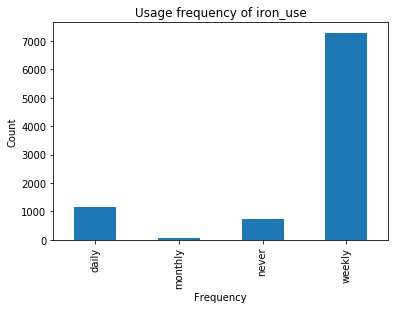

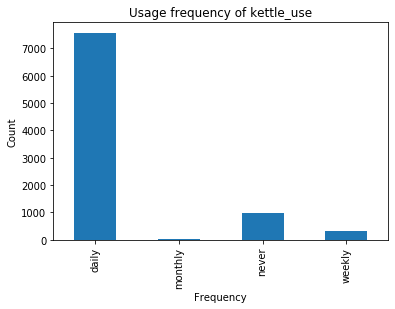

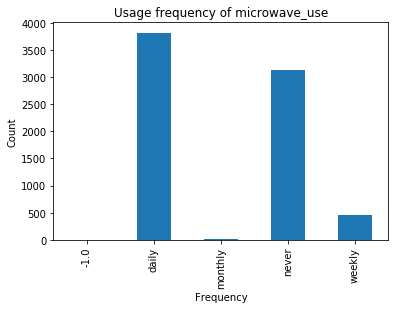

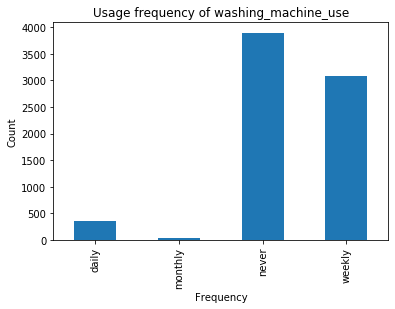

In [38]:
for i in range(len(e)):
    plt.figure
    e[i].plot.bar()
    plt.title("Usage frequency of " + e[i].index.name)
    plt.xlabel("Frequency")
    plt.ylabel("Count")
    plt.show()

In [32]:
e[0].index.name

'3_plate_use'